In [2]:
import pandas as pd
from pandas import Series,DataFrame

In [3]:
titanic = pd.read_csv('train.csv')

In [37]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

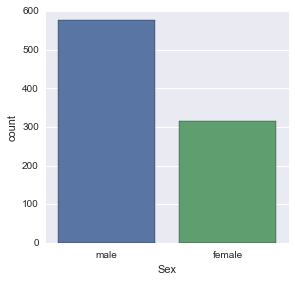

In [14]:
sns.factorplot(x ='Sex', data = titanic, kind = 'count')

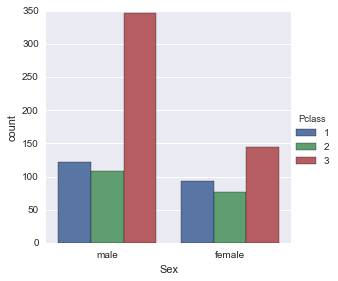

In [41]:
sns.factorplot('Sex', data = titanic,kind = 'count',hue = 'Pclass' )

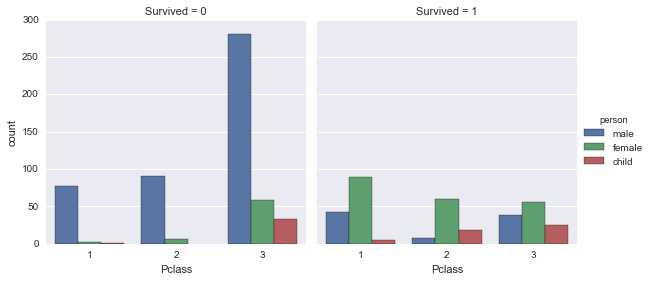

In [7]:
sns.factorplot('Pclass',data = titanic, hue = 'person', 
               kind = 'count',col = 'Survived')

In [5]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [6]:
titanic['person'] = titanic[['Age','Sex']].apply(male_female_child,
                                                axis = 1)

In [22]:
titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


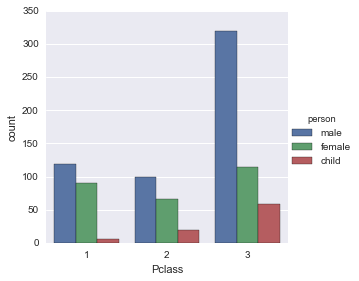

In [23]:
sns.factorplot('Pclass',data = titanic, kind = 'count',hue='person')

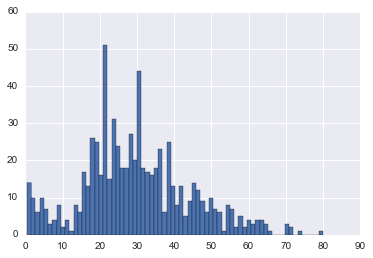

In [29]:
titanic['Age'].hist(bins =70)

In [10]:
titanic['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

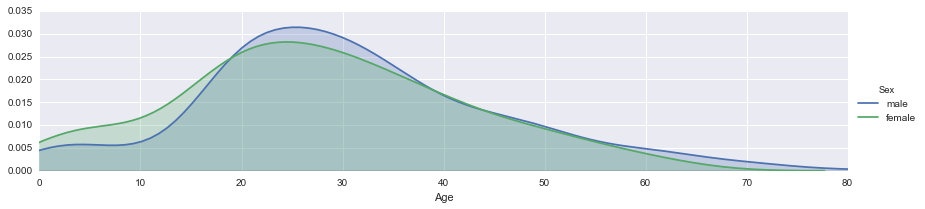

In [12]:
#count of sex by age
fig = sns.FacetGrid(titanic,hue = 'Sex',aspect = 4)
fig.map(sns.kdeplot , 'Age', shade = True)
oldest = titanic['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

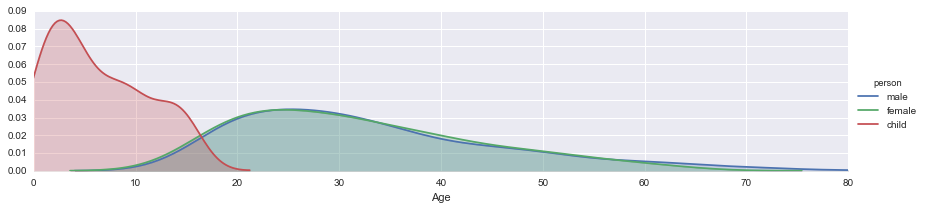

In [17]:
#count of person by age
fig = sns.FacetGrid(titanic,hue = 'person',aspect = 4)
fig.map(sns.kdeplot , 'Age', shade = True)
oldest = titanic['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

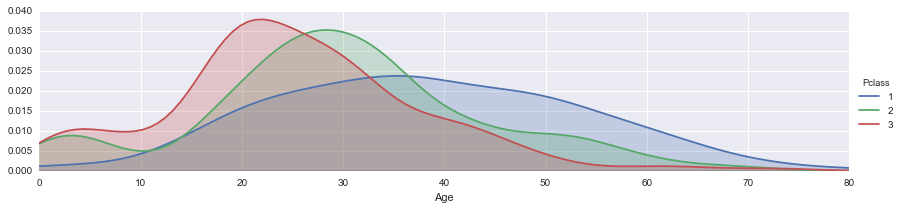

In [18]:
#count of class by age
fig = sns.FacetGrid(titanic,hue = 'Pclass',aspect = 4)
fig.map(sns.kdeplot , 'Age', shade = True)
oldest = titanic['Age'].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

In [19]:
deck = titanic['Cabin'].dropna()

In [20]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

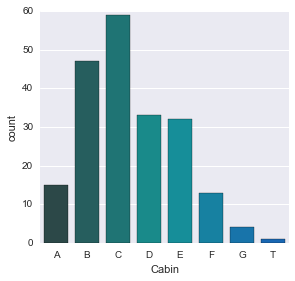

In [34]:
#count of cabin
levels = []

for level in deck:
    levels.append(level[0])
    
cabin = DataFrame(levels)
cabin.columns = ['Cabin']
sns.factorplot('Cabin',data = cabin,palette = 'winter_d', 
               kind = 'count',
               order = ['A','B','C','D','E','F','G','T'])

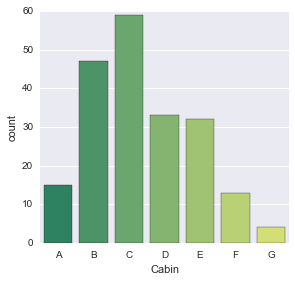

In [35]:
#drop T value
cabin = cabin[cabin.Cabin != 'T']

levels = []

for level in deck:
    levels.append(level[0])
    
cabin = DataFrame(levels)
cabin.columns = ['Cabin']
sns.factorplot('Cabin',data = cabin,palette = 'summer', 
               kind = 'count',
               order = ['A','B','C','D','E','F','G'])

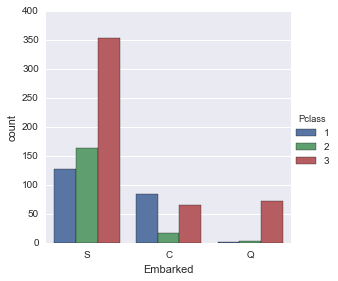

In [45]:
sns.factorplot(x ='Embarked', data = titanic, 
               kind = 'count',hue = 'Pclass')

In [47]:
 # who awas alone and who was with family
titanic['Alone'] = titanic.SibSp + titanic.Parch

In [52]:
titanic['Alone'][1:10]

1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

In [54]:
titanic['Alone'].loc[titanic['Alone'] >0] = 'with Family'
titanic['Alone'].loc[titanic['Alone'] ==0] ='Alone'

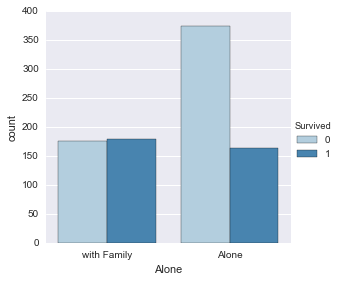

In [59]:
sns.factorplot( x='Alone', data = titanic, 
               palette = 'Blues', kind = 'count',hue = 'Survived')

In [60]:
titanic['Survivor'] = titanic.Survived.map({0:'no','1':'yes'})

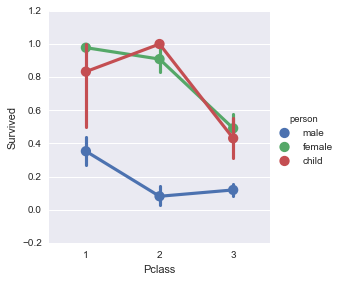

In [62]:
sns.factorplot('Pclass','Survived',hue ='person',data = titanic)

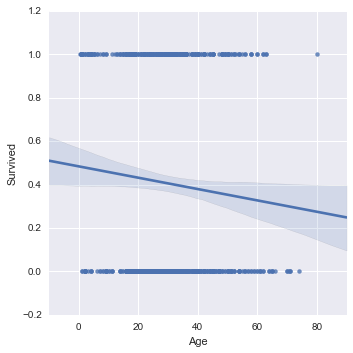

In [63]:
sns.lmplot('Age','Survived',data = titanic)

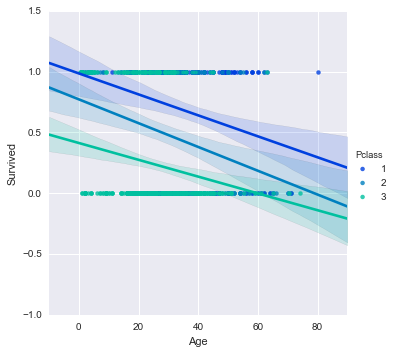

In [64]:
sns.lmplot('Age','Survived',data = titanic,
           hue='Pclass',palette = 'winter')

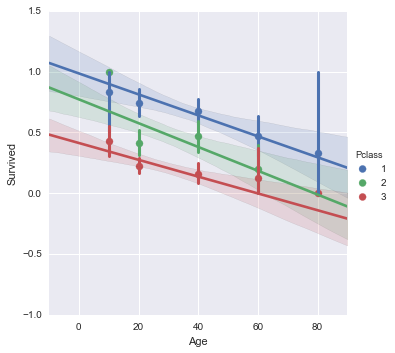

In [66]:
generations =[10,20,40,60,80] 
sns.lmplot('Age','Survived',hue ='Pclass',
          data = titanic, x_bins = generations)

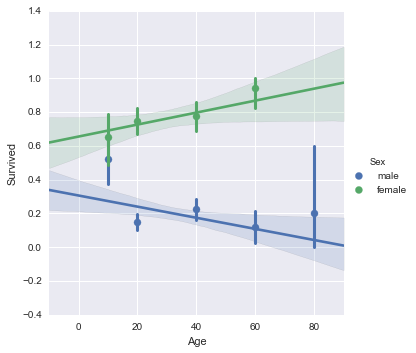

In [67]:
sns.lmplot('Age','Survived',data=titanic, 
           hue = 'Sex',x_bins=generations)

In [81]:
# did deck have an effect on survival rate

deck2 = titanic[['Cabin','Survived']]

In [83]:
deck2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
Cabin       204 non-null object
Survived    891 non-null int64
dtypes: int64(1), object(1)
memory usage: 14.0+ KB


In [89]:
deck3 = deck2.dropna()
deck3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 889
Data columns (total 2 columns):
Cabin       204 non-null object
Survived    204 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [90]:
def pro (Cabin):
    return Cabin[0]
deck3['deckID'] = deck3['Cabin'].map(pro)
deck3[0:15]

C:\Users\zzhan\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


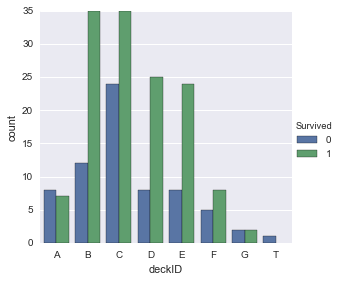

In [93]:
sns.factorplot('deckID',hue = 'Survived',
               data = deck3,kind = 'count',
               order = ['A','B','C','D','E','F','G','T'])